In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

path = "/Users/qooriq/PycharmProjects/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv"
df = pd.read_csv(path)
column_name = 'Exercise_Hours'
data = df[column_name]

mean = data.mean()
var = data.var()
mode = data.mode()[0]
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis = data.kurtosis()
skewness = data.skew()
iqr = quantiles[0.75] - quantiles[0.25]

print("Mean = ", mean)
print("Variance = ", var)
print("Mode = ", mode)
print("Quantiles = ")
print(quantiles)
print("Kurtosis = ", kurtosis)
print("Skewness = ", skewness)
print("IQR = ", iqr)

Mean =  1.0406666666666666
Variance =  0.5396661109258641
Mode =  0.0
Quantiles = 
0.25    0.5
0.50    1.0
0.75    1.5
Name: Exercise_Hours, dtype: float64
Kurtosis =  -0.2574880012747749
Skewness =  0.43863850250855985
IQR =  1.0


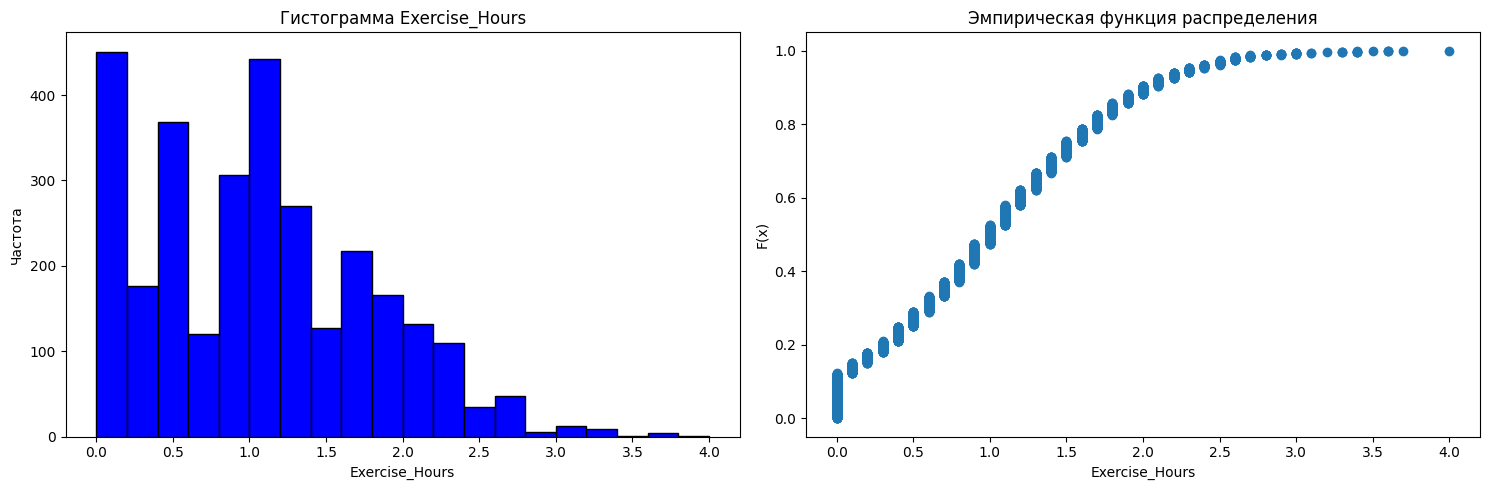

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data, bins=20, color='blue', edgecolor='black')
axes[0].set_title('Гистограмма ' + column_name)
axes[0].set_xlabel(column_name)
axes[0].set_ylabel('Частота')

sorted_data = np.sort(data)
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1].plot(sorted_data, y_vals, marker='o', linestyle='none')
axes[1].set_title('Эмпирическая функция распределения')
axes[1].set_xlabel(column_name)
axes[1].set_ylabel('F(x)')

plt.tight_layout()
plt.show()

Распределение бимодальное. По значениям среднего, моды и смещения можно понять, что распределение смещено вправо

(np.float64(334.93109958354256), np.float64(0.0), np.float64(11.070497693516351), np.False_)
2.7112493973078964e-22


Text(0.5, 1.0, 'Q-Q Plot')

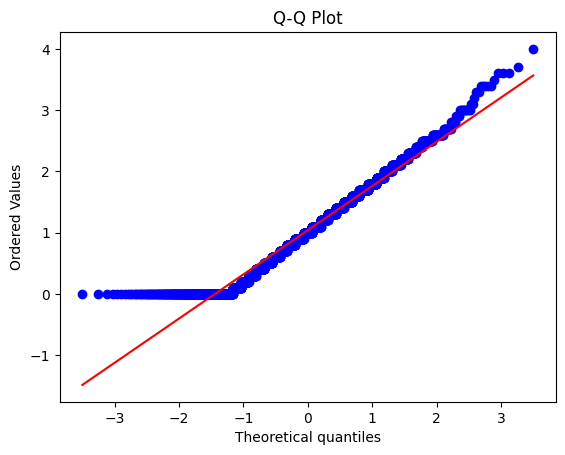

In [4]:
def chi_square(data, bins=10, alpha=0.05):
    observed_freq, bin_edges = np.histogram(data, bins=bins)
    mu, sigma = np.mean(data), np.std(data)
    expected_freq = []
    
    for i in range(len(bin_edges)-1):
        prob = stats.norm.cdf(bin_edges[i+1], mu, sigma) - stats.norm.cdf(bin_edges[i], mu, sigma)
        expected_freq.append(prob * len(data))
    
    expected_freq = np.array(expected_freq)
    mask = expected_freq >= 5
    observed_freq = observed_freq[mask]
    expected_freq = expected_freq[mask]
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    
    df = len(observed_freq) - 1 - 2
    critical_value = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    return chi2_stat, p_value, critical_value, p_value > alpha

chi_square_result = chi_square(data)
print(chi_square_result)
_, p_val = stats.normaltest(data)
print(p_val)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

На графике видно, что на концах распределение отличается от нормального. По chi-квадрату можно сказать, что распределение не нормальное.

III

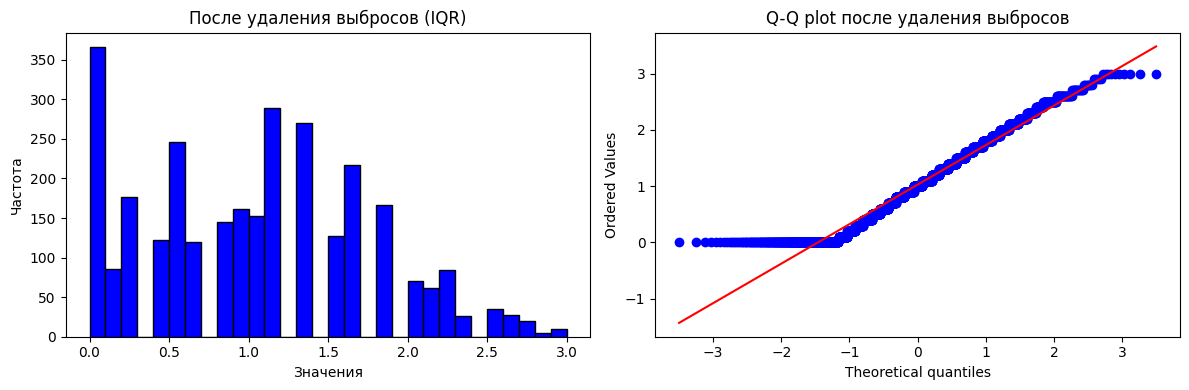

После удаления выбросов: Среднее = 1.0271, Стандартное отклонение = 0.7140


In [5]:
lower_bound = data.quantile(0.25) - 1.5 * iqr
upper_bound = data.quantile(0.75) + 1.5 * iqr

data_changed = data[(data >= lower_bound) & (data <= upper_bound)]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_changed, bins=30, color='blue', edgecolor='black')
plt.title('После удаления выбросов (IQR)')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_changed, dist="norm", plot=plt)
plt.title('Q-Q plot после удаления выбросов')
plt.tight_layout()
plt.show()

print(f"После удаления выбросов: Среднее = {data_changed.mean():.4f}, Стандартное отклонение = {data_changed.std():.4f}")

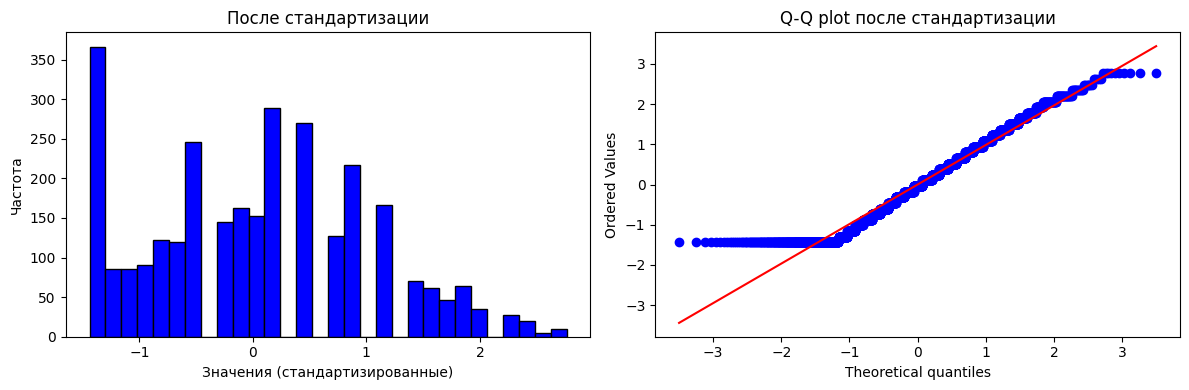

Среднее = -0.0000, Стандартное отклонение = 1.0000


In [6]:
data_standardized = (data_changed - data_changed.mean()) / data_changed.std()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_standardized, bins=30, color='blue', edgecolor='black')
plt.title('После стандартизации')
plt.xlabel('Значения (стандартизированные)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_standardized, dist="norm", plot=plt)
plt.title('Q-Q plot после стандартизации')
plt.tight_layout()
plt.show()

print(f"Среднее = {data_standardized.mean():.4f}, Стандартное отклонение = {data_standardized.std():.4f}")

Минимальное значение: 0.0
Добавлена константа: 1.0


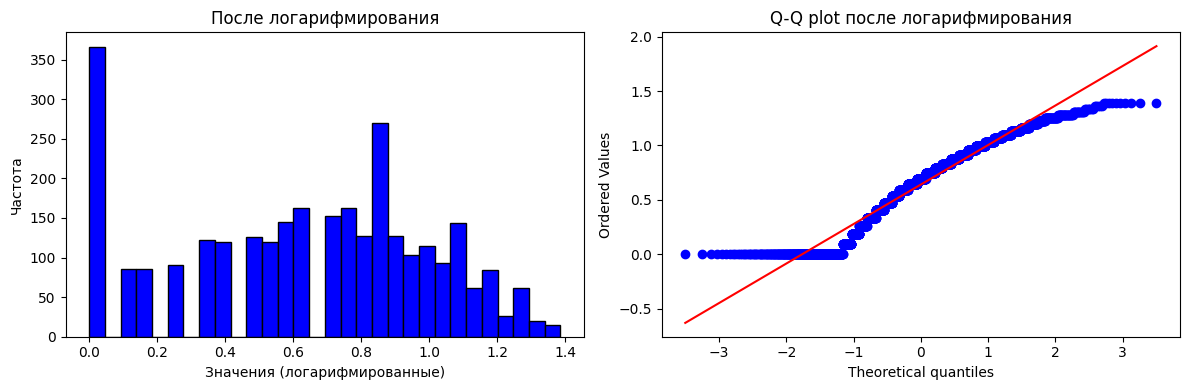

Среднее = 0.6405, Стандартное отклонение = 0.3719


In [7]:
print(f"Минимальное значение: {data_changed.min()}")

if data_changed.min() <= 0:
    shift_constant = abs(data_changed.min()) + 1
    data_shifted = data_changed + shift_constant
    print(f"Добавлена константа: {shift_constant}")
else:
    data_shifted = data_changed
    shift_constant = 0

data_log = np.log(data_shifted)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data_log, bins=30, color='blue', edgecolor='black')
plt.title('После логарифмирования')
plt.xlabel('Значения (логарифмированные)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
stats.probplot(data_log, dist="norm", plot=plt)
plt.title('Q-Q plot после логарифмирования')
plt.tight_layout()
plt.show()

print(f"Среднее = {data_log.mean():.4f}, Стандартное отклонение = {data_log.std():.4f}")

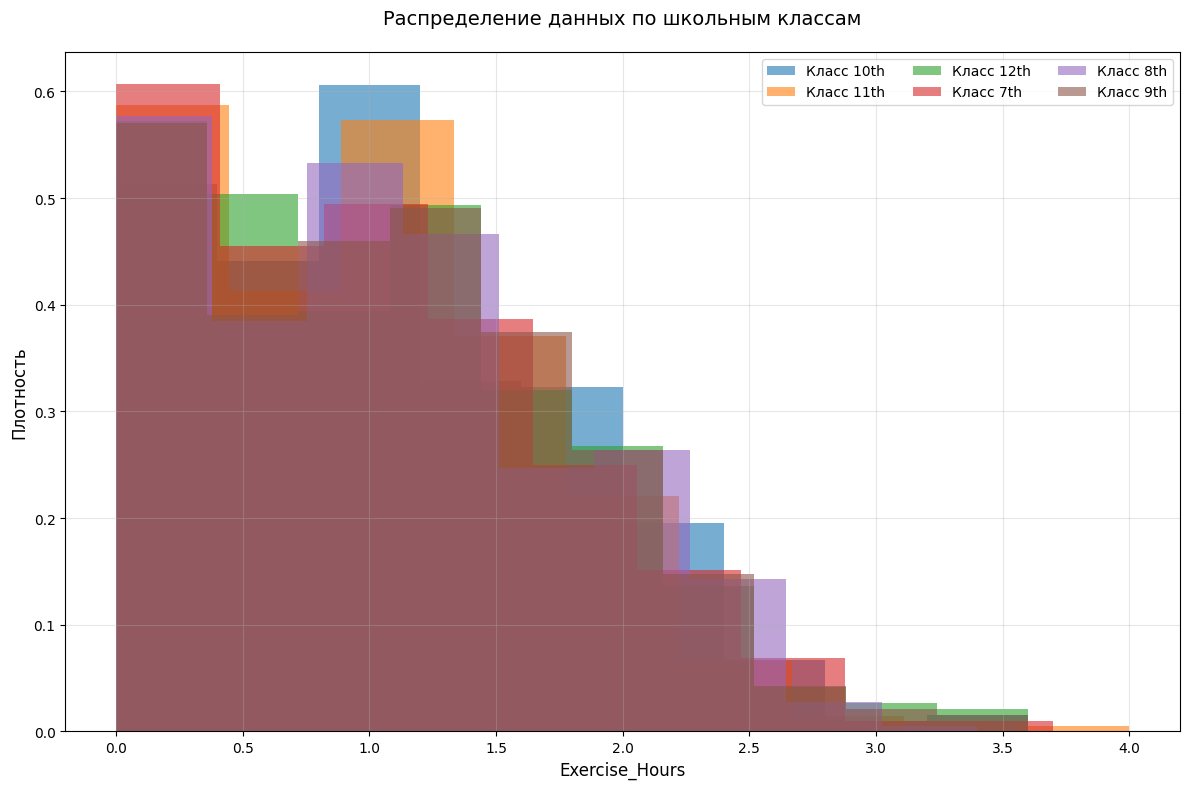

Статистики по School_Grade:
              Среднее  Дисперсия  Количество
School_Grade                                
10th           1.0425     0.5365         487
11th           0.9795     0.4867         479
12th           1.0459     0.5642         529
7th            1.0296     0.5324         497
8th            1.0620     0.5517         482
9th            1.0802     0.5617         526


In [10]:
groups = df.groupby("School_Grade")

plt.figure(figsize=(12, 8))

n_grades = len(groups)
ncols = min(3, n_grades)

for grade, subset in groups:
    k = 1 + int(np.log2(len(subset))) 
    plt.hist(subset[column_name], bins=k, alpha=0.6, label=f"Класс {grade}", density=True)

plt.xlabel(column_name, fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.title("Распределение данных по школьным классам", fontsize=14, pad=20)
plt.legend(ncol=ncols, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

stats_by_grade = groups[column_name].agg(['mean', 'var', 'count']).round(4)
stats_by_grade.columns = ['Среднее', 'Дисперсия', 'Количество']

print("Статистики по School_Grade:")
print(stats_by_grade)